# Select and visualize remote sensing image with PyStac
- https://python-visualization.github.io/folium/quickstart.html
- https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/


In [1]:
import pandas as pd
import geopandas as gpd
import rasterio as rio

import pystac
import pystac_client

import matplotlib.pyplot as plt

# 1 - Set catalog 

In [3]:
# Define the catalog from planetary 
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

## Explore Catalog

In [4]:
catalog

id: microsoft-pc
title: Microsoft Planetary Computer STAC API
description: Searchable spatiotemporal metadata describing Earth science datasets hosted by the Microsoft Planetary Computer
type: Catalog
"conformsTo: ['http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core', 'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson', 'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/oas30', 'http://www.opengis.net/spec/ogcapi-features-3/1.0/conf/filter', 'https://api.stacspec.org/v1.0.0-rc.1/collections', 'https://api.stacspec.org/v1.0.0-rc.1/core', 'https://api.stacspec.org/v1.0.0-rc.1/item-search', 'https://api.stacspec.org/v1.0.0-rc.1/item-search#fields', 'https://api.stacspec.org/v1.0.0-rc.1/item-search#filter', 'https://api.stacspec.org/v1.0.0-rc.1/item-search#filter:basic-cql', 'https://api.stacspec.org/v1.0.0-rc.1/item-search#filter:cql-json', 'https://api.stacspec.org/v1.0.0-rc.1/item-search#filter:cql-text', 'https://api.stacspec.org/v1.0.0-rc.1/item-search#query', 'https://api.stacspec.org/v1.0.0-rc.1/item-search#sort', 'https://api.stacspec.org/v1.0.0-rc.1/ogcapi-features']"
id: daymet-annual-pr
title: Daymet Annual Puerto Rico
"description: Annual climate summaries derived from [Daymet](https://daymet.ornl.gov) Version 4 daily data at a 1 km x 1 km spatial resolution for five variables: minimum and maximum temperature, precipitation, vapor pressure, and snow water equivalent. Annual averages are provided for minimum and maximum temperature, vapor pressure, and snow water equivalent, and annual totals are provided for the precipitation variable. [Daymet](https://daymet.ornl.gov/) provides measurements of near-surface meteorological conditions; the main purpose is to provide data estimates where no instrumentation exists. The dataset covers the period from January 1, 1980 to the present. Each year is processed individually at the close of a calendar year. Data are in a Lambert conformal conic projection for North America and are distributed in Zarr and NetCDF formats, compliant with the [Climate and Forecast (CF) metadata conventions (version 1.6)](http://cfconventions.org/). Use the DOI at [https://doi.org/10.3334/ORNLDAAC/1852](https://doi.org/10.3334/ORNLDAAC/1852) to cite your usage of the data. This dataset provides coverage for Hawaii; North America and Puerto Rico are provided in [separate datasets](https://planetarycomputer.microsoft.com/dataset/group/daymet#annual)."
"providers: Microsoft (host, processor) ORNL DAAC (producer)"
type: Collection
sci:doi: 10.3334/ORNLDAAC/1852


# 2 - Search


In [5]:
# # select sentinel collection
# items = catalog.search(
#     collections=["sentinel-2-l2a"],
#     bbox=bbox,
#     datetime="2019-06-01/2019-06-10",
#     query =  {"eo:cloud_cover":{"lt":10}},
# ).get_all_items()

In [6]:
time_range = "2019-06-01/2019-06-10"
bbox = ( -45,-21.56,  -44.5,-21)

# -67.008753, -9.96445, -65.615556, -8.57408

search = catalog.search(collections=["landsat-c2-l2"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)

2

In [7]:
df = gpd.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df

,geometry,gsd,created,sci:doi,datetime,platform,proj:epsg,proj:shape,description,instruments,...,landsat:wrs_row,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category
0,"POLYGON ((-45.31621 -20.62605, -43.56102 -20.9...",30,2022-05-06T16:38:41.740344Z,10.5066/P9OGBGM6,2019-06-07T12:57:33.351735Z,landsat-8,32623,"[7771, 7681]",Landsat Collection 2 Level-2,"[oli, tirs]",...,075,LC82180752019158LGN00,218,2,35.132620,L2SP,36.844555,4.17,02,T1
1,"POLYGON ((-44.97322 -19.18461, -43.23463 -19.5...",30,2022-05-06T16:38:37.992544Z,10.5066/P9OGBGM6,2019-06-07T12:57:09.409865Z,landsat-8,32623,"[7781, 7681]",Landsat Collection 2 Level-2,"[oli, tirs]",...,074,LC82180742019158LGN00,218,2,35.548572,L2SP,38.149223,7.12,02,T1


# Select item from STAC

In [8]:
# Some collections implement the eo extension, which we can use to sort the items by cloudiness. We’ll grab an item with low cloudiness:

selected_item = min(items, key=lambda item: item.properties["eo:cloud_cover"])
print(selected_item)

<Item id=LC08_L2SP_218075_20190607_02_T1>


## item metadata
- directly from asset
- with rasterio/rioxarray

In [ ]:
# Each STAC item has one or more Assets, which include links to the actual files.

import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key        ┃ Description                                                          ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ qa               │ Surface Temperature Quality Assessment Band                          │
│ ang              │ Angle Coefficients File                                              │
│ red              │ Red Band                                                             │
│ blue             │ Blue Band                                                            │
│ drad             │ Downwelled Radiance Band                                             │
│ emis             │ Emissivity Band                                                      │
│ emsd             │ Emissivity Standard Deviation Band                                   │
│ trad             │ Thermal Radiance Band                                                │
│ urad             │ Upwelled Radiance Band                                               │
│ atran            │ Atmospheric Transmittance Band                                       │
│ cdist            │ Cloud Distance Band                                                  │
│ green            │ Green Band                                                           │
│ nir08            │ Near Infrared Band 0.8                                               │
│ lwir11           │ Surface Temperature Band                                             │
│ swir16           │ Short-wave Infrared Band 1.6                                         │
│ swir22           │ Short-wave Infrared Band 2.2                                         │
│ coastal          │ Coastal/Aerosol Band                                                 │
│ mtl.txt          │ Product Metadata File (txt)                                          │
│ mtl.xml          │ Product Metadata File (xml)                                          │
│ mtl.json         │ Product Metadata File (json)                                         │
│ qa_pixel         │ Pixel Quality Assessment Band                                        │
│ qa_radsat        │ Radiometric Saturation and Terrain Occlusion Quality Assessment Band │
│ qa_aerosol       │ Aerosol Quality Assessment Band                                      │
│ tilejson         │ TileJSON with default rendering                                      │
│ rendered_preview │ Rendered preview                                                     │
└──────────────────┴──────────────────────────────────────────────────────────────────────┘

In [14]:
rio.open(selected_item.assets["mtl.txt"].href)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "rasterio/_base.pyx", line 308, in rasterio._base.DatasetBase.__init__
  File "rasterio/_base.pyx", line 219, in rasterio._base.open_dataset
  File "rasterio/_err.pyx", line 221, in rasterio._err.exc_wrap_pointer
rasterio._err.CPLE_HttpResponseError: HTTP response code: 404

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/lucas/miniconda3/envs/geos/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_9801/2679337594.py", line 1, in <module>
    rio.open(selected_item.assets["mtl.txt"].href)
  File "/home/lucas/miniconda3/envs/geos/lib/python3.11/site-packages/rasterio/env.py", line 451, in wrapper
    return f(*args, **kwds)
           ^^^^^^^^^^^^^^^^
  File "/home/lucas/miniconda3/envs/geos/lib/python3.11/site-packages/rasterio/__init__.py", line 304, in open
    d

## Quick view

In [ ]:
# Here, we’ll inspect the rendered_preview asset.

selected_item.assets["rendered_preview"].to_dict()
# {'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=landsat-c2-l2&item=LC08_L2SP_047027_20201204_02_T1&assets=red&assets=green&assets=blue&color_formula=gamma+RGB+2.7%2C+saturation+1.5%2C+sigmoidal+RGB+15+0.55',
#  'type': 'image/png',
#  'title': 'Rendered preview',
#  'rel': 'preview',
#  'roles': ['overview']}
from IPython.display import Image

Image(url=selected_item.assets["rendered_preview"].href, width=500)

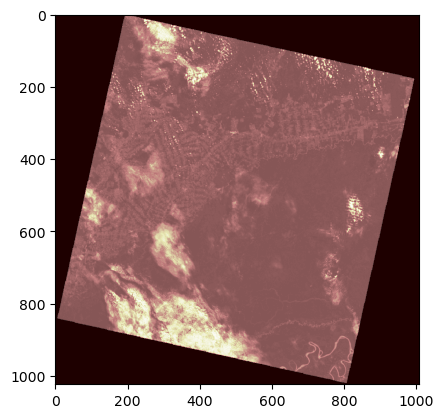

In [ ]:
url=selected_item.assets["rendered_preview"].href
src = rio.open(url)
plt.imshow(src.read(1), cmap='pink')

In [ ]:
# url = resdict['features'][0]['assets']['B08']['href']
# src = rasterio.open(url)
# plt.imshow(src.read(1), cmap='pink')

## save the search to Json file

# Explore the raster data

In [ ]:
import contextily

search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=[-124.2751, 45.5469, -110.9613, 47.7458],
    datetime="2020-12-26/2020-12-31",
)
items = search.get_all_items()

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")

ax = df[["geometry", "datetime", "s2:mgrs_tile", "eo:cloud_cover"]].plot(
    facecolor="none", figsize=(12, 6)
)
contextily.add_basemap(ax, crs=df.crs.to_string());

ModuleNotFoundError: No module named 'contextily'

# Visualize with geopandas explore

In [ ]:
import shapely
import folium

gdf = gpd.GeoDataFrame.from_features(
    items.to_dict(), 
    crs="EPSG:4326"
)
bbox_geom = shapely.geometry.mapping(shapely.geometry.box(*bbox))
bbox_layer = folium.GeoJson(bbox_geom)

m = gdf.explore(column="eo:cloud_cover")
bbox_layer.add_to(m)
m

NameError: name 'shapely' is not defined